In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let’s prepare some data

In [2]:
bikes_Q1 = pd.read_csv('bikes_q1_sample.csv')
bikes_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [3]:
bikes_Q1[['start_time', 'end_time']] = bikes_Q1[['start_time', 'end_time']].apply(pd.to_datetime)
bikes_Q1.set_index('start_time', drop=True, inplace = True)

In [4]:
bikes_Q1.head()

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-22 20:04:31,17617135,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
2018-03-16 19:47:59,17897619,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2018-03-14 18:49:20,17881307,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
2018-03-14 18:33:48,17881130,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
2018-02-05 17:39:14,17686289,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


Let’s find the maximum number of rentals per day.

In [5]:
bikes_Q1.resample(rule='D').size().max()

4196

Let’s look at the distribution of the number of rentals for different user groups (*usertype*) — customers and subscribers in the data for **April**

In [6]:
bikes_april = pd.read_csv('bikes_april.csv')
bikes_april.head(3)

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0


In [7]:
bikes_april[['start_time', 'end_time']] = bikes_april[['start_time', 'end_time']].apply(pd.to_datetime)
bikes_april.set_index('start_time', drop=True, inplace = True)

In [8]:
bikes_april[bikes_april.usertype == 'Subscriber'].resample(rule='D').size().loc['2018-04-18']

2196

Let’s look at the data for the period from April to December

In [9]:
# List of all CSV files
csv_files = [
    'bikes_q2_sample_apr.csv', 'bikes_q2_sample_may.csv', 'bikes_q2_sample_jun.csv',
    'bikes_q3_sample_july.csv', 'bikes_q3_sample_aug.csv', 'bikes_q3_sample_sep.csv',
    'bikes_q4_sample_oct.csv', 'bikes_q4_sample_nov.csv', 'bikes_q4_sample_dec.csv'
]

# Read and concatenate all CSV files
bikes = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

bikes.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000534,2018-04-01 00:17:00,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
1,18000536,2018-04-01 00:20:00,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2,18000538,2018-04-01 00:23:19,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
3,18000540,2018-04-01 00:24:46,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
4,18000541,2018-04-01 00:26:04,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [10]:
bikes[['start_time', 'end_time']] = bikes[['start_time', 'end_time']].apply(pd.to_datetime)
bikes.set_index('start_time', drop=True, inplace = True)

In [11]:
bikes_unstack = bikes.groupby('usertype').resample(rule='D').trip_id.count().to_frame().unstack(level=0)

In [12]:
bikes_unstack

trip_id           
usertype   Customer Subscriber
start_time                    
2018-04-01      166        549
2018-04-02      110       1865
2018-04-03       19       1276
2018-04-04       53       1501
2018-04-05       62       1637
...             ...        ...
2018-12-27       28        684
2018-12-28       65        872
2018-12-29       23        350
2018-12-30       55        385
2018-12-31       27        352

[275 rows x 2 columns]

In [13]:
br = bikes_unstack.loc[:, ('trip_id', 'Customer')] > bikes_unstack.loc[:, ('trip_id', 'Subscriber')]
br.loc[br == True]

start_time
2018-05-27    True
2018-09-02    True
Freq: 98D, dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

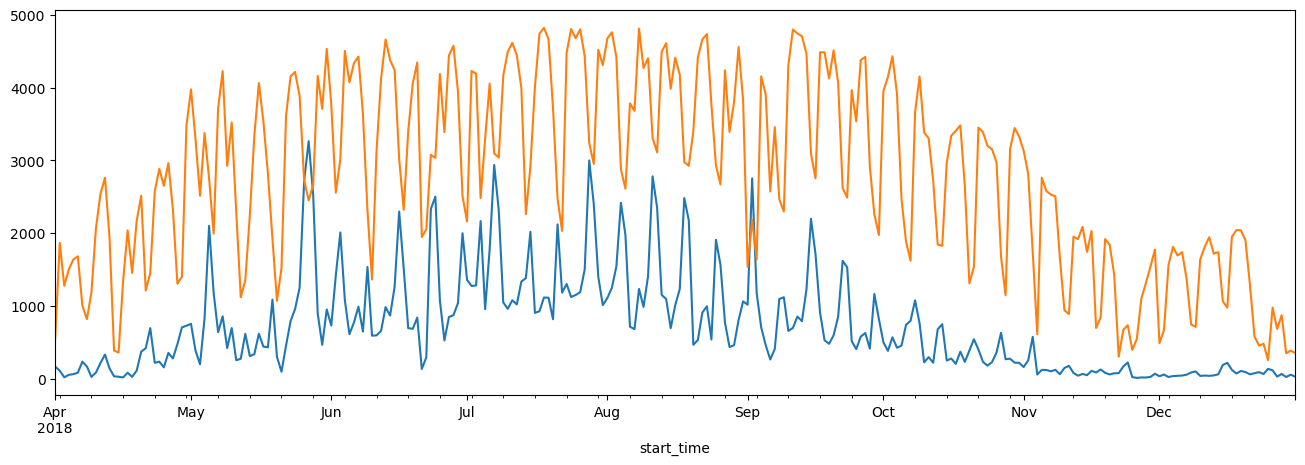

In [14]:
plt.figure(figsize=(16, 5))
bikes[bikes.usertype == 'Customer'].resample(rule='D').size().plot()
bikes[bikes.usertype == 'Subscriber'].resample(rule='D').size().plot()
plt.show

The next step is to take a closer look at the summer period

In [15]:
# filter
bikes_summer = bikes.loc['2018-06-01':'2018-08-31']

In [16]:
# top destination
top_destination = bikes_summer.to_station_name.value_counts().idxmax()
top_destination

'Streeter Dr & Grand Ave'

In [17]:
bad_day = (bikes_summer.loc[bikes_summer.to_station_name == top_destination]
                      .resample(rule='D').size()
                      .idxmin()
                      .strftime('%Y-%m-%d'))
bad_day

'2018-06-21'

Let’s find out where people travel the most on weekends

In [18]:
bikes_summer = bikes_summer.assign(weekday = lambda x: pd.to_datetime(x.index).strftime('%A'))

In [19]:
bikes_summer.head(3)

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,weekday
start_time,,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0,Friday
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN,Friday
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0,Friday


In [20]:
(bikes_summer.groupby(['weekday', 'to_station_name'])
             .size()
             .sort_values(ascending=False))

weekday    to_station_name            
Saturday   Streeter Dr & Grand Ave        3461
Sunday     Streeter Dr & Grand Ave        2565
Friday     Streeter Dr & Grand Ave        1726
Saturday   Lake Shore Dr & North Blvd     1690
Wednesday  Streeter Dr & Grand Ave        1669
                                          ... 
Sunday     Pulaski Rd & Lake St              1
Monday     Racine Ave & 65th St              1
Saturday   Halsted St & 59th St              1
Friday     South Chicago Ave & 83rd St       1
Monday     Austin Blvd & Madison St          1
Length: 3893, dtype: int64